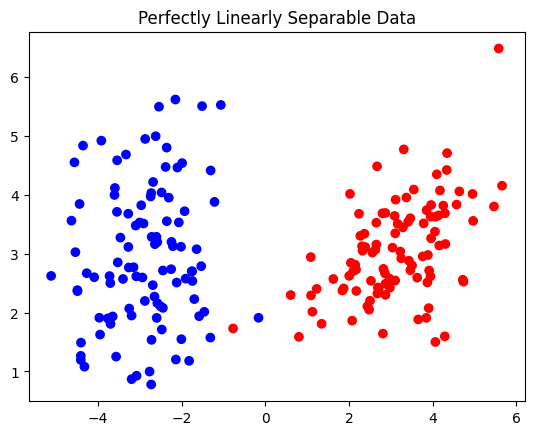

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(42)
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=3.0,      # VERY IMPORTANT
    flip_y=0,           # no noise
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr")
plt.title("Perfectly Linearly Separable Data")
plt.show()


In [2]:
import numpy as np

class Perceptron:

    def __init__(self):
        self.weights = None

    def step(self , z):
        return 1 if z > 0 else 0

    def fit(self, X, y, lr=0.1, epochs=1):
        # add bias term
        X = np.insert(X, 0, 1, axis=1)
        self.weights = np.ones(X.shape[1])

        for _ in range(epochs):
            for i in range(X.shape[0]):
                j = np.random.randint(0, X.shape[0])
                y_hat = self.step(X[j] @ self.weights)
                self.weights = self.weights + lr * (y[j] - y_hat) * X[j]

        return self.weights[0], self.weights[1:]


In [4]:
p = Perceptron()

In [6]:
intercept_,coef_ = p.fit(X,y)

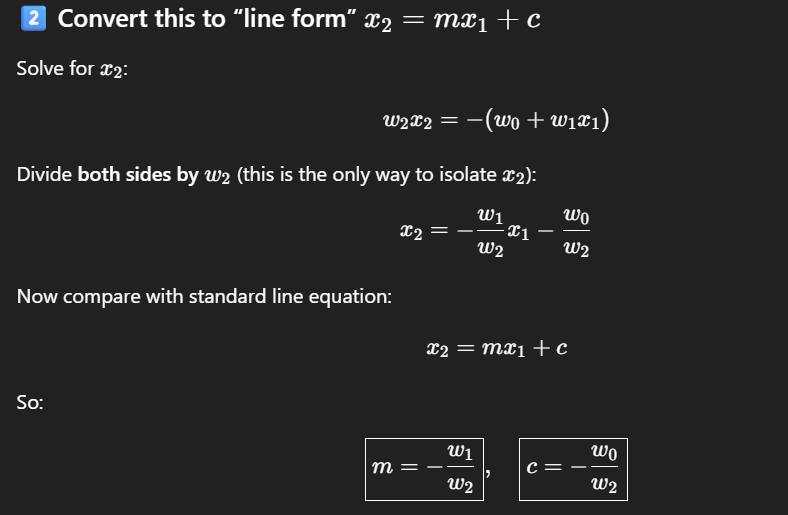

In [7]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [9]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(0.0, 8.0)

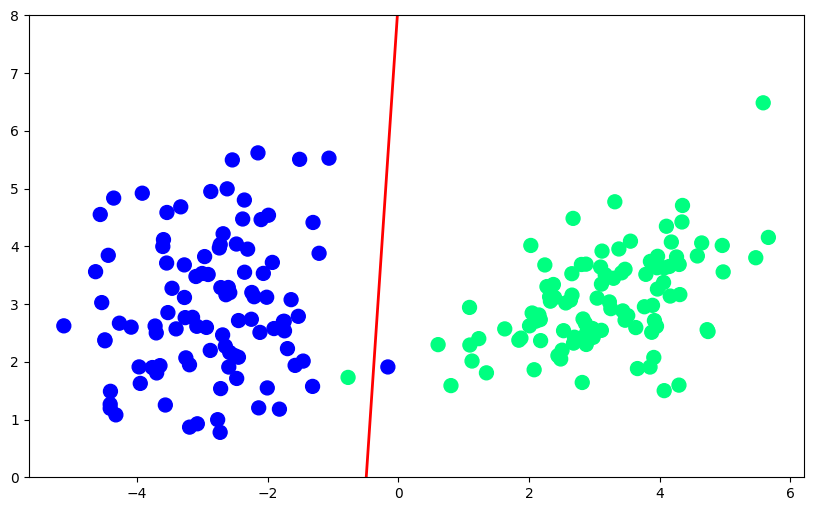

In [15]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(0,8)

In [2]:
# problem with perceptron that it never result in a fix line it is always random so for that reason we need a method that converges 
#towards a fixed result that why we need Logistic regeression 